In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv(r'C:\Users\praja\Downloads\StockPricePrediction.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [20]:
df.shape

(1009, 7)

In [21]:
# checking null value
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

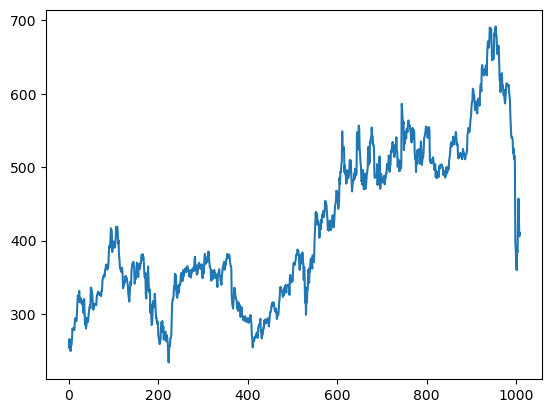

In [23]:
df['Close'].plot()

In [24]:
#splitting the dataset
x=df[['Open','High','Low','Volume']].values
y=df['Close'].values

In [25]:
from sklearn.model_selection import train_test_split
#splitting the data 80% train and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import statsmodels.api as sm
#creating Regression model
regressor= LinearRegression()
#fit linear regression model
model=regressor.fit(x_train,y_train)
#use model to make predictions
y_pred=regressor.predict(x_test)

In [27]:
#with the test prediction complete,the next step will better compare them
#with the actual output values for x_test by organizing them in a DataFrameformet:
predicted=regressor.predict(x_test)
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

     Actual_Price  Predicted_Price
0      553.729980       553.971012
1      379.059998       379.757155
2      361.399994       360.310529
3      281.859985       283.776008
4      261.429993       260.128418
..            ...              ...
197    504.790009       507.476185
198    315.339996       314.480526
199    257.950012       255.423282
200    305.160004       306.913361
201    410.170013       403.145091

[202 rows x 2 columns]


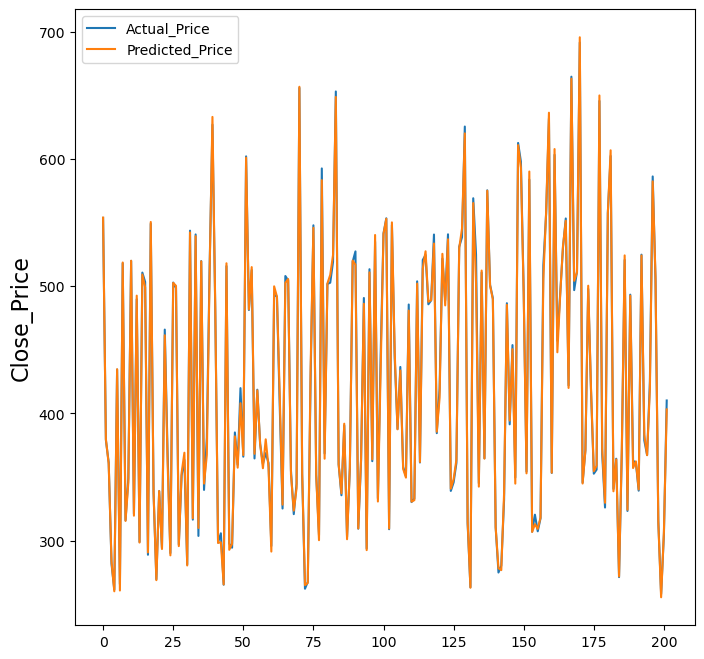

In [28]:
plt.figure(figsize=(8,8))
plt.ylabel('Close_Price',fontsize=16)
plt.plot(dfr)
plt.legend(['Actual_Price','Predicted_Price'])
plt.show()

<Axes: >

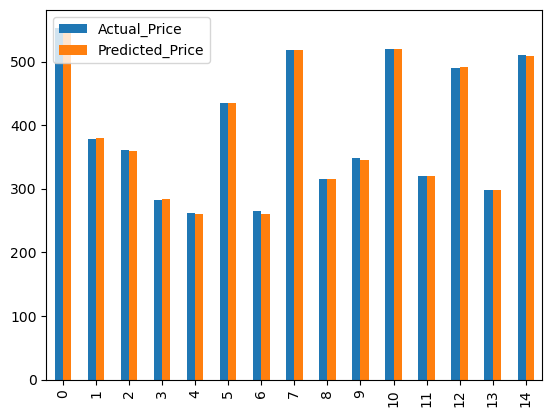

In [29]:
#graph for the first 15 values
graph=dfr.head(15)
graph.plot(kind='bar')